# **1. IMPORT LIBRARY**

In [25]:
# library umum
import numpy as np 
import pandas as pd  
import warnings
warnings.simplefilter('ignore')
import gc

# library keras
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
from keras import metrics
from keras.metrics import Precision
from tqdm.keras import TqdmCallback
from keras.backend import clear_session


# library sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
from sklearn.metrics import accuracy_score

# library menampilkan data
import seaborn as sns
import matplotlib.pyplot as plt

# **2. DATA UNDERSTANDING**

## **2.1. IMPORT DATA**

In [26]:
# load data
file_path = 'ionosphere.data'
dataset = pd.read_csv(file_path, sep=",", header=None)
dataset.fillna(method='ffill', inplace=True)
dataset.head()


,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [27]:
#isi dataset
dataset[34].value_counts()

g    225
b    126
Name: 34, dtype: int64

## **2.2. DESKRIPSI DATA**

In [28]:
#deskripsi data
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,...,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,...,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,...,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,...,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,...,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **2.3. PLOTTING DATA**

### **2.3.1. PLOTTING PENYEBARAN DATA**

In [29]:
# #plotting penyebaran data
# from pandas.plotting import scatter_matrix
# scatter_matrix(dataset, alpha=0.5, figsize=(15, 15))
# plt.show()

### **2.3.2. PLOTTING JUMLAH DATA**

In [30]:
# #plotting jumlah data
# dataset.hist(alpha=0.5, figsize=(15, 15), color='red')
# plt.show()

### **2.3.3. MELIHAT BENTUK DATA**

In [31]:
dataset.shape

(351, 35)

## **2.4. PEMBAGIAN DATA**

In [32]:
#INIT
# Splitting the data into input and output columns
X, y = dataset.values[:, :-1], dataset.values[:, -1]
# ensure all values are floatinf types
X = X.astype('float32')

# Encode strings to integer
y = LabelEncoder().fit_transform(y)

In [33]:
X

array([[ 1.     ,  0.     ,  0.99539, ..., -0.54487,  0.18641, -0.453  ],
       [ 1.     ,  0.     ,  1.     , ..., -0.06288, -0.13738, -0.02447],
       [ 1.     ,  0.     ,  1.     , ..., -0.2418 ,  0.56045, -0.38238],
       ...,
       [ 1.     ,  0.     ,  0.94701, ...,  0.00442,  0.92697, -0.00577],
       [ 1.     ,  0.     ,  0.90608, ..., -0.03757,  0.87403, -0.16243],
       [ 1.     ,  0.     ,  0.8471 , ..., -0.06678,  0.85764, -0.06151]],
      dtype=float32)

In [34]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [35]:
# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=151, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Determine the number of features
n_features = X_train.shape[1]
print('Number of features:', n_features)

(200, 34) (151, 34) (200,) (151,)
Number of features: 34


# **3. IMPLEMENTASI SLP**

## **3.1. HASIL PEMBAGIAN DATA**

In [36]:
# record stats
print(f"JUMLAH DATA TRAINING = {X_train.shape[0]} \nJUMLAH DATA TESTING = {X_test.shape[0]} ")

JUMLAH DATA TRAINING = 200 
JUMLAH DATA TESTING = 151 


## **3.2. MEMBUAT MODEL dan TRAINING MODEL**

In [37]:
# MEMBUAT MODEL
model_389= models.Sequential()
model_389.add(layers.Dense(1, activation='relu',use_bias=True, kernel_initializer='uniform', input_shape=(n_features,)))  # Input layer
model_389.summary()                                                                   #untuk arsitektur yang dihasilkan          
          

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 35        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


In [38]:
# COMPILE MODEL
opt = keras.optimizers.Adam(learning_rate=0.15)
model_389.compile(optimizer=opt, loss='MSE', metrics= ['accuracy'])
          
# FIT MODEL
epochs = 1000
hist = model_389.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_test, y_test),verbose=0,callbacks=[TqdmCallback(verbose=1)]) # Hint: You can change the verbose value to 2 to see epochs


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

# **4. HASIL AKURASI DAN JUMLAH ITERASI**

In [39]:
akurasi = '{:.2%}'.format(sum(hist.history['accuracy'])/len(hist.history['accuracy']))
print(f"Model mendapatkan rata-rata akurasi sebesar {akurasi} dengan jumlah epoch {epochs}")

Model mendapatkan rata-rata akurasi sebesar 91.86% dengan jumlah epoch 1000


# **5. PLOTTING HASIL AKURASI DAN PREDIKSI**

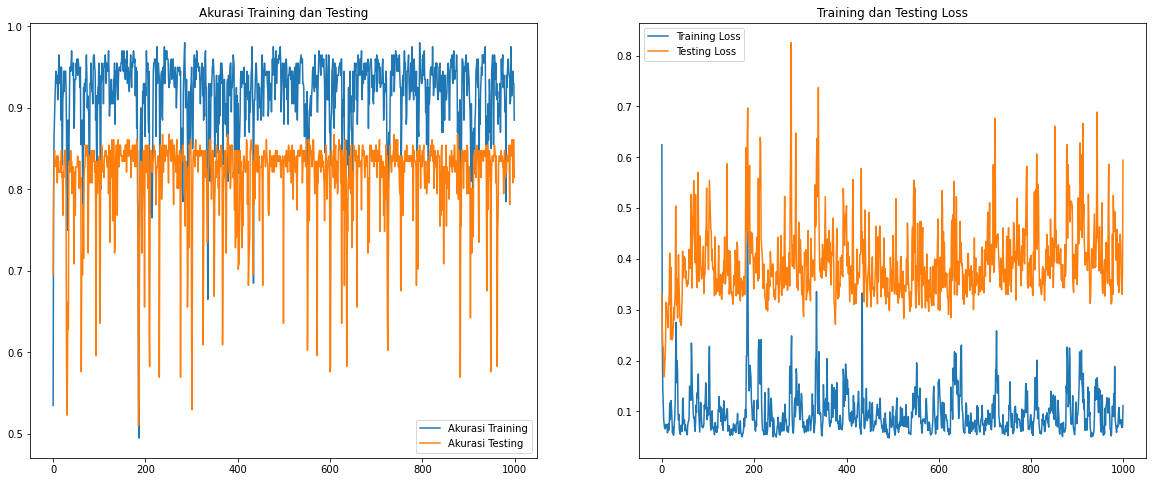

In [40]:
#MENAMPILKAN HASIL TRAINING DATA
akurasi = hist.history['accuracy']
nilai_akurasi = hist.history['val_accuracy']
loss = hist.history['loss']
nilai_loss = hist.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, akurasi, label='Akurasi Training')
plt.plot(epochs_range, nilai_akurasi, label='Akurasi Testing')
plt.legend(loc='lower right')
plt.title('Akurasi Training dan Testing')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, nilai_loss, label='Testing Loss')
plt.legend(loc='upper left')
plt.title('Training dan Testing Loss')
plt.show()

In [41]:
# EVALUASI MODEL PADA DATA TESTING
loss, acc = model_389.evaluate(X_test, y_test, verbose=1)
print('Test accuracy : %.3f' %acc ,"\nTest loss : %.3f" %loss)

5/5 [==============================] - 0s 3ms/step - loss: 0.5943 - accuracy: 0.8146
Test accuracy : 0.815 
Test loss : 0.594


5/5 [==============================] - 0s 2ms/step


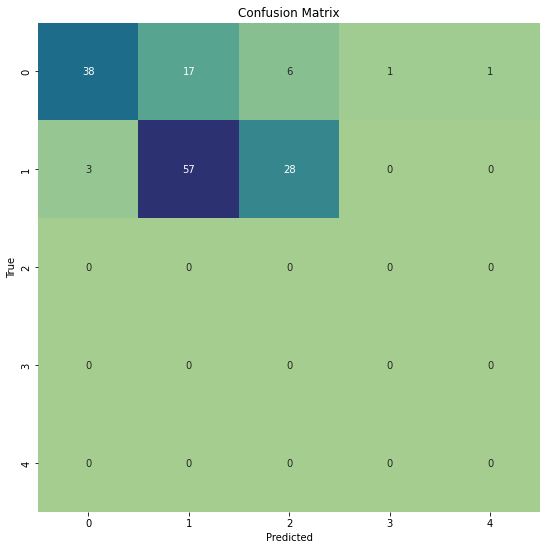

In [42]:
# Predictions 
y_pred = model_389.predict(X_test)
y_pred_class = [round(x[0]) for x in y_pred]
y_test_class = y_test

# confusion matrix
cfm = confusion_matrix(y_test_class, y_pred_class)

# visualise confusion matrix
plt.figure(figsize=(9,9))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cfm.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
sns.heatmap(cfm, annot=True, cmap='crest', cbar=False, fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()